# Configuração de ambiente

Importação das bibliotecas:

- Numpy: para computação numérica
- Pandas: para manipulação de dados através do alias "pd"
- Google Colab: para manipulação de arquivos no Google Drive
- Matplotlib: para criação de gráficos e visualizações de dados
- Seaborn: para visualização de dados
- Warnings: para poder alterar a visualização de warnings do sistema

E execução do comando "%matplotlib inline" para que os gráficos sejam exibidos no notebook logo abaixo da célula de código que os gerou.

In [86]:
import numpy as np
import pandas as pd
from google.colab import drive
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime

warnings.filterwarnings("ignore", category=FutureWarning)

sns.set()

%matplotlib inline

Carregamento do Drive para que o notebook possa acessar os arquivos do Google Drive e com o parâmetro "force_remount=True" para que o Drive seja montado a cada execução do notebook.

In [87]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Leitura e visualização do dataset

Leitura do arquivo "dataset_clean.csv" através da função "read_csv" do Pandas e armazenamento do resultado na variável "df". Uso do parâmetro "sep" para informar qual o separador de colunas do arquivo e do parâmetro "encoding" para informar qual o tipo de codificação do arquivo.

In [139]:
csv_url = "https://github.com/viniciusgugelmin/data-science/blob/main/projects/base_de_despesas/data/dataset_clean.csv?raw=true"

df = pd.read_csv(csv_url, sep=';', low_memory=False)
df = df.sort_values('DATA', ascending=True).reset_index().drop('index', axis=1)

Atribuição do limite na exibição do dataset para 50 colunas e 20 linhas, afim de conseguir visualizar melhor os dados.

In [135]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 20)

Exibição das 5 primeiras linhas do DataFrame através da função "head" do Pandas para verificar se o arquivo foi carregado corretamente e ter uma ideia do que ele contém.

In [140]:
df.head()

,DATA,FONTE,FUNCAO,PROGRAMA,ACAO,SUBELEMENTO,ORGAO,TIPO,ELEMENTO,DOCUMENTO,VALOR_EMPENHADO,ITEM,UNIDADE_ITEM,QUANTIDADE_ITEM,VALOR_PRECO_UNITARIO,VALOR_TOTAL,DATA_TRANSACAO,STATUS_TRANSACAO,VALOR_LIQUIDADO,VALOR_DEVOLVIDO,VALOR_ANULADO,VALOR_PAGO,VALOR_CONSIGNADO,DOCUMENTO_TIPO
0,2022-06-01,Recursos Ordinários (Livres),ESSENCIAL À JUSTIÇA,PROGRAMA VIVA CURITIBA TRANSPARENTE,"MANUTENÇÃO DA ESTRUTURA FUNCIONAL, VOLTADA AO ...",LIMPEZA E CONSERVAÇÃO,PROCURADORIA GERAL DO MUNICÍPIO,OUTROS SERVIÇOS DE TERCEIROS - PESSOA JURÍDICA,Outros Serviços de Terceiros - Pessoa Jurídica,14983004000141,11600.0,SEM ITEM,SEM UNIDADE,0.0,0.0,0.0,2022-08-24 00:00:00.000,Liquidação de Empenho,1320.68,0.0,0.0,0.00,0.0,CNPJ
1,2022-06-01,Recursos Ordinários (Livres),ESSENCIAL À JUSTIÇA,PROGRAMA VIVA CURITIBA TRANSPARENTE,"MANUTENÇÃO DA ESTRUTURA FUNCIONAL, VOLTADA AO ...",SERVIÇOS JUDICIÁRIOS,PROCURADORIA GERAL DO MUNICÍPIO,OUTROS SERVIÇOS DE TERCEIROS - PESSOA JURÍDICA,Outros Serviços de Terceiros - Pessoa Jurídica,75153494000143,2200.0,SEM ITEM,SEM UNIDADE,0.0,0.0,0.0,2022-08-11 00:00:00.000,Liquidação de Empenho,18.36,0.0,0.0,0.00,0.0,CNPJ
2,2022-06-01,Recursos Ordinários (Livres),ESSENCIAL À JUSTIÇA,PROGRAMA VIVA CURITIBA TRANSPARENTE,"MANUTENÇÃO DA ESTRUTURA FUNCIONAL, VOLTADA AO ...",SERVIÇOS JUDICIÁRIOS,PROCURADORIA GERAL DO MUNICÍPIO,OUTROS SERVIÇOS DE TERCEIROS - PESSOA JURÍDICA,Outros Serviços de Terceiros - Pessoa Jurídica,75153494000143,2200.0,SEM ITEM,SEM UNIDADE,0.0,0.0,0.0,2022-08-05 00:00:00.000,Pagamento de Empenho,0.00,0.0,0.0,2181.64,0.0,CNPJ
3,2022-06-01,Recursos Ordinários (Livres),ESSENCIAL À JUSTIÇA,PROGRAMA VIVA CURITIBA TRANSPARENTE,"MANUTENÇÃO DA ESTRUTURA FUNCIONAL, VOLTADA AO ...",SERVIÇOS JUDICIÁRIOS,PROCURADORIA GERAL DO MUNICÍPIO,OUTROS SERVIÇOS DE TERCEIROS - PESSOA JURÍDICA,Outros Serviços de Terceiros - Pessoa Jurídica,75153494000143,2200.0,SEM ITEM,SEM UNIDADE,0.0,0.0,0.0,2022-08-04 00:00:00.000,Liquidação de Empenho,2181.64,0.0,0.0,0.00,0.0,CNPJ
4,2022-06-01,Recursos Ordinários (Livres),SANEAMENTO,PROGRAMA VIVA UMA NOVA CURITIBA,"GESTÃO DOS SERVIÇOS DE LIMPEZA PÚBLICA, EFETUA...",SERVIÇOS DE CONTROLE AMBIENTAL,SECRETARIA MUNICIPAL DO MEIO AMBIENTE,OUTROS SERVIÇOS DE TERCEIROS - PESSOA JURÍDICA,Outros Serviços de Terceiros - Pessoa Jurídica,19090702000131,16686.4,SEM ITEM,SEM UNIDADE,0.0,0.0,0.0,2022-07-14 00:00:00.000,Pagamento de Empenho,0.00,0.0,0.0,10429.00,0.0,CNPJ


# Criação de funções utilitárias

In [141]:
def contLinhasDfFormatado(_df):
  aux = f'{len(_df):_.0f}'
  aux = aux.replace('.', ',')
  return aux.replace('_', '.')

def formataData(data, formatoOrigem):
  dataFormatada = datetime.strptime(data, formatoOrigem)
  dataFormatada = dataFormatada.strftime('%d/%m/%Y')
  return dataFormatada

# Perguntas iniciais

- Qual o total de despesas que temos no dataset?

In [142]:
cont_df = contLinhasDfFormatado(df)

print(cont_df)

35.981


- Qual o período de data dessas despesas?

In [143]:
df_data_order = df.copy()

first_date = formataData(df_data_order['DATA'][0], '%Y-%m-%d')
last_date = formataData(df_data_order['DATA'][len(df_data_order)-1], '%Y-%m-%d')

print(first_date, last_date, sep=' - ')

01/06/2022 - 31/08/2022


- Quantas despesas tiveram itens envolvidos?

In [144]:
df_item = df[df['ITEM'] != "SEM ITEM"]
cont_df_item = contLinhasDfFormatado(df_item)

print(cont_df_item)

9.374


- Qual a porcentagem de despesas com itens?

In [145]:
porcentagem_com_item = (len(df_item)/len(df))*100

print(f'{porcentagem_com_item:.1f}%')

26.1%


- Quantas depesas foram de "Assistência social"?

In [146]:
df_assistencia_social = df[df['FUNCAO'] != "ASSISTÊNCIA SOCIAL"]
cont_df_assistencia_social = contLinhasDfFormatado(df_assistencia_social)

print(cont_df_assistencia_social)

28.148


- Qual a porcentagem de despesas com "Assistência social"?

In [147]:
porcentagem_assistencia_social = (len(df_assistencia_social)/len(df))*100

print(f'{porcentagem_assistencia_social:.1f}%')

78.2%


- Quantas despesas foram geradas em cima de um CNPJ, CPF e documento desconhecido?

In [148]:
df_cnpj = df[df['DOCUMENTO_TIPO'] == "CNPJ"]
cont_df_cnpj = contLinhasDfFormatado(df_cnpj)

df_cpf = df[df['DOCUMENTO_TIPO'] == "CPF"]
cont_df_cpf = contLinhasDfFormatado(df_cpf)

print('CNPJ:', cont_df_cnpj)
print('CNPJ:', cont_df_cpf)

CNPJ: 32.923
CNPJ: 3.058


- Qual a porcentagem de despesas em cima de um CNPJ e CPF?

In [149]:
porcentagem_cnpj = (len(df_cnpj)/len(df))*100
porcentagem_cpf = (len(df_cpf)/len(df))*100

print('CNPJ:', f'{porcentagem_cnpj:.1f}%')
print('CPF:', f'{porcentagem_cpf:.1f}%')

CNPJ: 91.5%
CPF: 8.5%


# Visualização dos dados

Átravés da visualização abaixo conseguimos visualizar essa diferença entre despesas em CNPJ e CPF já mostrada nas perguntas iniciais.

[Text(0.5, 1.0, 'Pecentual de despesas de CNPJ e CPF')]

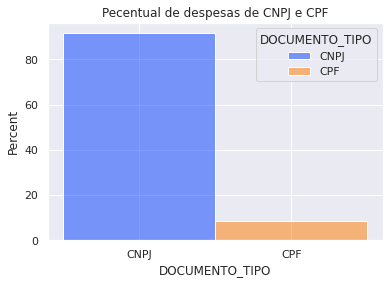

In [150]:
sns.histplot(data=df, x="DOCUMENTO_TIPO", hue="DOCUMENTO_TIPO", stat="percent", palette="bright").set(title='Pecentual de despesas de CNPJ e CPF')

Conseguimos perceber, através do gráfico abaixo, que se obteve um valor maior com as despesas no mês de julho, se comparado com os outros meses.

[Text(0.5, 1.0, 'Valor total de despesas por mês em milhões')]

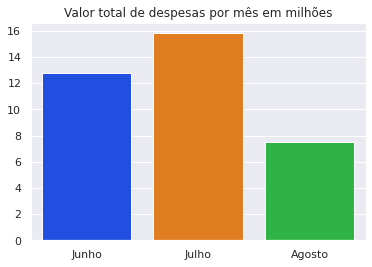

In [151]:
df_jun = df[df['DATA'].str.contains('2022-06')]
df_jul = df[df['DATA'].str.contains('2022-07')]
df_aug = df[df['DATA'].str.contains('2022-08')]

total_jun = df_jun['VALOR_TOTAL'].sum()
total_jul = df_jul['VALOR_TOTAL'].sum()
total_aug = df_aug['VALOR_TOTAL'].sum()

total_jun = total_jun/1000000
total_jul = total_jul/1000000
total_aug = total_aug/1000000

sns.barplot(x=['Junho', 'Julho', 'Agosto'], y=[total_jun, total_jul, total_aug], palette="bright").set(title='Valor total de despesas por mês em milhões')

Entretanto, notamos que o mês de julho foi o que menos teve despesas, mesmo tendo mais gastos.

[Text(0.5, 1.0, 'quantidade de despesas por mês')]

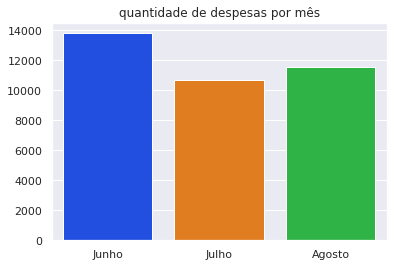

In [152]:
total_jun_cont = len(df_jun)
total_jul_cont = len(df_jul)
total_aug_cont = len(df_aug)

sns.barplot(x=['Junho', 'Julho', 'Agosto'], y=[total_jun_cont, total_jul_cont, total_aug_cont], palette="bright").set(title='quantidade de despesas por mês')

O gráfico abaixo mostra o histórico do valor total de despesas por porcentagem do período de datas, sendo o 0 o início do período salvo no dataset de despesas, e 100 o final. Percebemos então que o motivo de termos um mês com poucas despesas, mas um valor altíssimo, se deve pelos picos de valores entre o 40% e 60%, que representam o mês de julho.

[Text(0.5, 1.0, 'Histórico do valor de despesas por porcentagem')]

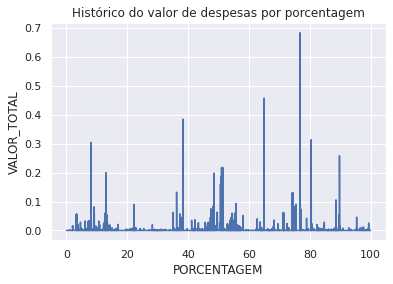

In [176]:
df_data_order = df.copy()
df_data_order['PORCENTAGEM'] = df_data_order.index
df_data_order['PORCENTAGEM'] = df_data_order['PORCENTAGEM']/len(df_data_order)*100

df_data_order['VALOR_TOTAL'] = df_data_order['VALOR_TOTAL']/1000000

sns.lineplot(x='PORCENTAGEM', y='VALOR_TOTAL', data=df_data_order, palette="Blues_d").set(title='Histórico do valor de despesas por porcentagem')